In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import ujson as json

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [79]:
df1 = pd.read_csv('/data/zhenyus/belady.log', 
                 sep=' ', 
                 names=['identifier', 't', 'a', 'id', 'f'], 
#                  nrows=10000,
                )

In [80]:
df1.loc[df1.f == -1, 'f'] = 3e8

In [81]:
df1.head()

,identifier,t,a,id,f
0,[action],6477155,e,27,300000000.0
1,[action],6477155,e,111,300000000.0
2,[action],6477155,e,210,300000000.0
3,[action],6477155,e,234,300000000.0
4,[action],6477155,e,270,300000000.0


In [82]:
len(df1)

27456107

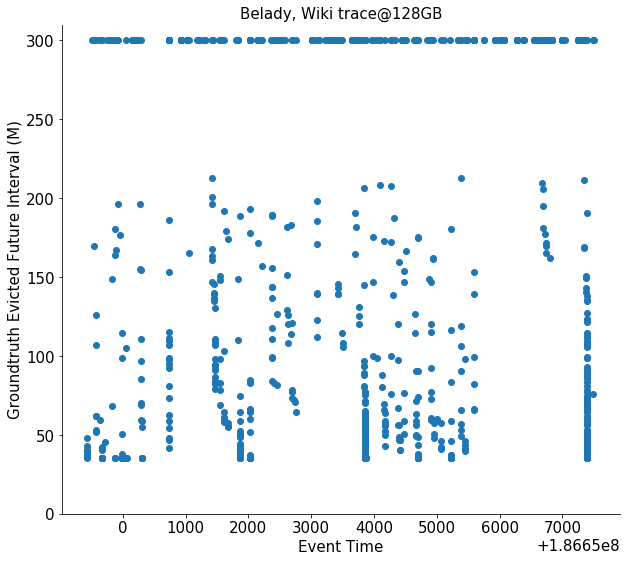

In [155]:
base = 13005000
n = 1000
fig, ax = plt.subplots(figsize=(10, 9))
plt.scatter(df1.t[base:base+1000], df1.f[base:base+1000]/1e6)
plt.ylim(bottom=0, top=310)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'Event Time')
plt.ylabel('Groundtruth Evicted Future Interval (M)')
plt.title('Belady, Wiki trace@128GB')
plt.show()

In [84]:
df2 = pd.read_csv('/data/zhenyus/gbdt_filter.log', 
                 sep=' ', 
                 names=['identifier', 't', 'a', 'f'], 
#                  nrows=10000,
                )

In [85]:
len(df2)

116001825

In [86]:
df2.loc[df2.f == -1, 'f'] = 3e8

In [87]:
len(df2[df2.a == 'e'])

36500233

In [88]:
len(df2[df2.a == 'ef'])

157139

In [89]:
len(df2[df2.a == 'e2'])

2241965

In [90]:
len(df2[df2.a == 'ep0'])

38551244

In [91]:
len(df2[df2.a == 'ep1'])

38551244

In [100]:
df2_e = df2[(df2.a != 'ep0') & (df2.a != 'ep1')].reset_index(drop=True)

In [101]:
df2_p0 = df2[(df2.a == 'ep0')].reset_index(drop=True)
df2_p1 = df2[(df2.a == 'ep1')].reset_index(drop=True)

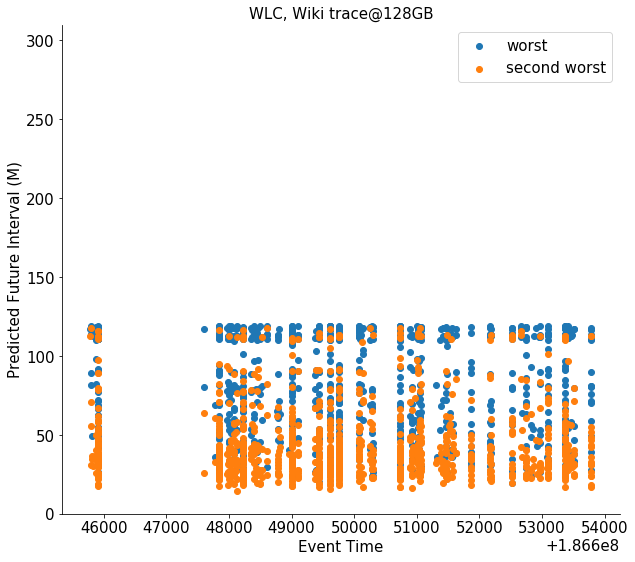

In [137]:
base = 20000000
n = 1000

fig, ax = plt.subplots(figsize=(10, 9))
# plt.scatter(df2_e.t[base:base+1000], df2_e.f[base:base+1000])
plt.scatter(df2_p0.t[base:base+1000], df2_p0.f[base:base+1000]/1e6, label='worst')
plt.scatter(df2_p1.t[base:base+1000], df2_p1.f[base:base+1000]/1e6, label='second worst')
plt.legend()
plt.ylim(bottom=0, top=310)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'Event Time')
plt.ylabel('Predicted Future Interval (M)')
plt.title('WLC, Wiki trace@128GB')
plt.show()

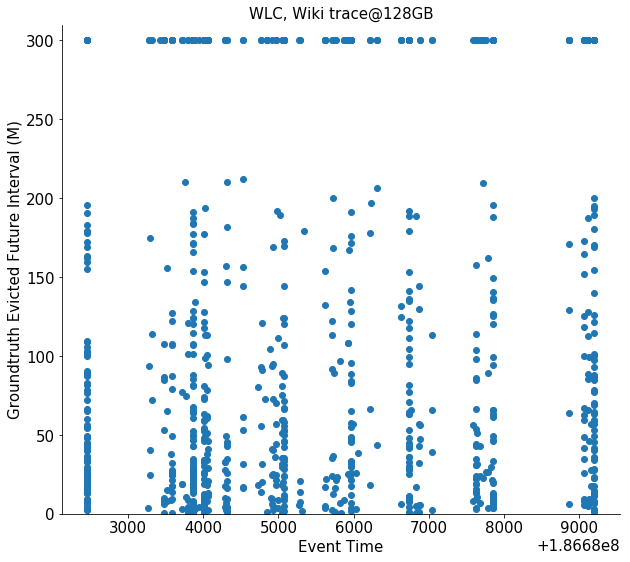

In [138]:
base = 20320000
n = 1000

fig, ax = plt.subplots(figsize=(10, 9))
plt.scatter(df2_e.t[base:base+1000], df2_e.f[base:base+1000]/1e6)

plt.ylim(bottom=0, top=310)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'Event Time')
plt.ylabel('Groundtruth Evicted Future Interval (M)')
plt.title('WLC, Wiki trace@128GB')
plt.show()

In [ ]:
1